<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW8_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# Section 3.3.1 - Necessary and Sufficient Conditions of Local Minimizers

def obj_func(x):
  x0 = x[0]
  x1 = x[1]
  return 0.4*x0**2 - 7*x0 + x1**2 - 4*x1 #The function we want to minimize

bounds = [(0,10), (0,10)]
guess = [0, 0] #provides initial guess of where to start taking gradients from to min
opt = minimize(obj_func, guess, method = 'SLSQP', bounds = bounds)
print(opt)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -34.62499999958538
       x: [ 8.750e+00  2.000e+00]
     nit: 5
     jac: [ 1.907e-05  2.766e-05]
    nfev: 15
    njev: 5


Above printout from minimize function tells me that the function value at my optimal solution is -34.625. The x segment is telling me the x values where the optimal solution occurs at.

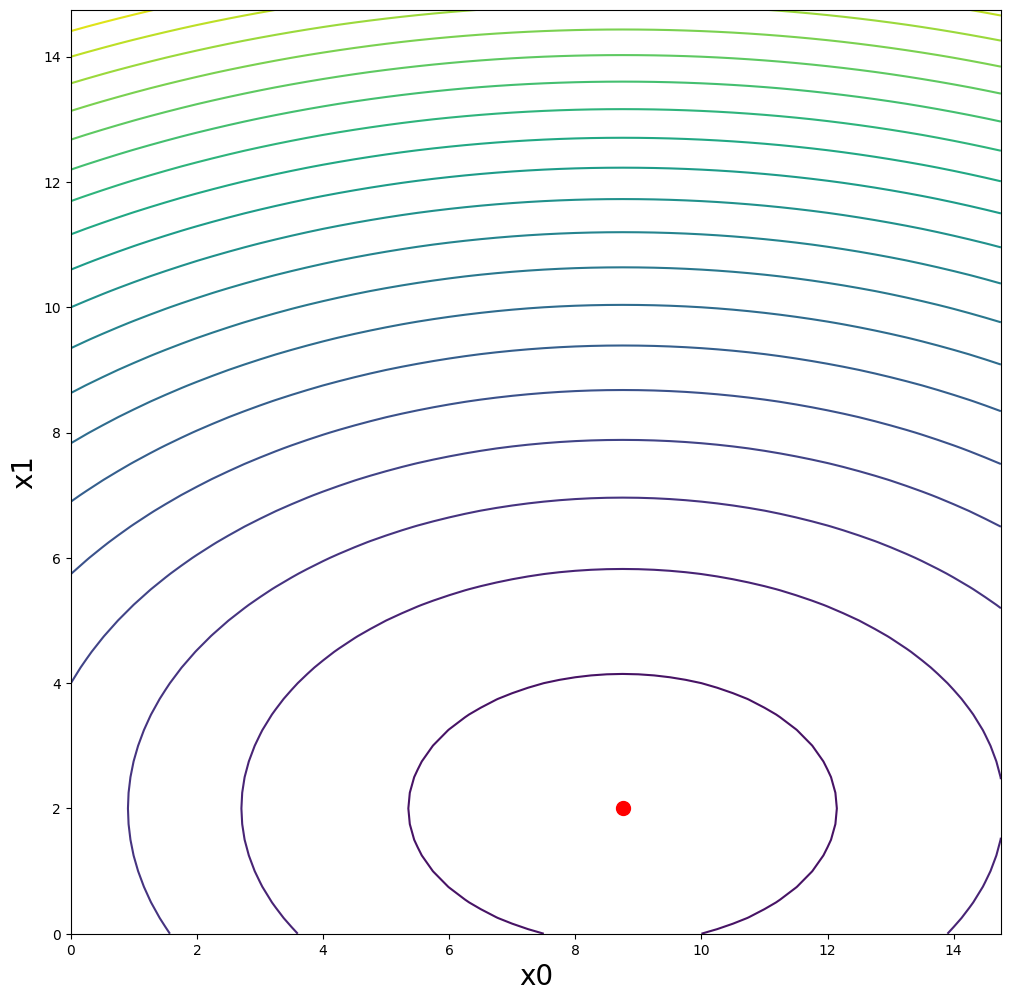

In [25]:
# Plot of above obj_func equation to visually show minima occurence
x_0 = np.arange(0,15,0.25)
x_1 = np.arange(0,15,0.25)
x_0, x_1 = np.meshgrid(x_0, x_1)

revenue = 0.4*x_0**2 - 7*x_0 + x_1**2 - 4*x_1

fig,ax = plt.subplots(1,1)
cp = ax.contour(x_0, x_1, revenue, levels = 20)

plt.xticks()
plt.yticks()

fig = plt.gcf()
fig.set_size_inches(12,12)

ax.set_xlabel('x0', fontsize = 20)
ax.set_ylabel('x1', fontsize = 20)

plt.plot(opt.x[0], opt.x[1], 'ro', markersize = 10) # This place a marker where our optimal solution points are.

plt.show()


The above gradient plot converges around the red dot that was placed. At the red dot, we can see the optimal solution coordinates.

Convex Optimization is used to solve an optimization of an objective function by finding either the min or the max of the objective function depending on the desired goal.

Convex problems are often solved with algorithms like gradient descent, interior-point methods, or other convex solvers.

CVXPY is a library used to perform convex optimization.

In [27]:
# Section 3.3.2 - Convexity and Global Minimizers

import cvxpy as cp

# Define variables
x = cp.Variable(3)

# Create matrix for the Q in the f(x) below
Q = np.array([[2, 1, 0],
              [1, 4, 1],
              [0, 1, 6]])

# Define the linear term (c vector)
c = np.array([0, 0, 0])

# Here is the objective function
obj = cp.Minimize(0.5 * cp.quad_form(x, Q) + c.T @ x) #This is the function f(x) = (1/2)x^T*Q*x + c^T*x

# Define constraints
constrnts = [x[0] + x[1] + x[2] == 1,  #Creates constraints x1 + x2 + x3 = 1
               x >= 0]

# Set up the problem
prob = cp.Problem(obj, constrnts)

# Solve the problem
prob.solve()

# Output the results
print(f"Optimal value: {prob.value}")
print(f"Optimal solution for x: {x.value}")

Optimal value: 0.7142857142857144
Optimal solution for x: [0.64285714 0.14285714 0.21428571]


Gradient Descent - optimization algorithm used to minimize an objective function by iteratively moving towards the function's minimum. It takes small steps in the direction of the negative gradient of the function, which points towards the steepest descent, reducing the value of the objective function with each iteration until a minimum is reached. Since gradient descent does iterative derivations, the function continue until the gradient is equal to or as close as possible to 0. This will inidcate a local min.

In [34]:
# Section 3.3.3 - Gradient Descent

# Function f(x):
def function(x):
    return 2*(x**2) - 5*x + 3

# Derivative of f(x):
def derivative(x):
    return 4*x - 5

# Gradient Descent parameters
learning_rate = 0.05  # Step size
iterations = 30     # Number of iterations

# Initial guess for x (starting point)
x = 0.0

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = derivative(x)
    x = x - learning_rate * grad #Iterates through from starting point

# Value of x after optimization is minimum of function
min_x = x
min_f = function(min_x)

print(f"Minimum value of x: {min_x}")
print(f"Minimum of f: {min_f}")

Minimum value of x: 1.2484525749508932
Minimum of f: -0.12499521095143518
